## Gold Price - Analysis & Forecasting

## Import libraries <a class="anchor" id="section_1.1"></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Import model libraries
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## Import data <a class="anchor" id="section_1.2"></a>

In [2]:
df = pd.read_csv("infy_stock.csv",usecols=['Date', 'Close'])
df.head()

,Date,Close
0,01-01-2015,1974.40
1,02-01-2015,2013.20
2,05-01-2015,1995.90
3,06-01-2015,1954.20
4,07-01-2015,1963.55


In [3]:
rankings_pd = df
   
rankings_pd.rename(columns = {'Close':'Price'}, inplace = True)

In [4]:
df=rankings_pd
df

,Date,Price
0,01-01-2015,1974.40
1,02-01-2015,2013.20
2,05-01-2015,1995.90
3,06-01-2015,1954.20
4,07-01-2015,1963.55
...,...,...
243,24-12-2015,1096.35
244,28-12-2015,1104.75
245,29-12-2015,1104.70
246,30-12-2015,1086.30


In [5]:
# Import the price data
df.head()

,Date,Price
0,01-01-2015,1974.40
1,02-01-2015,2013.20
2,05-01-2015,1995.90
3,06-01-2015,1954.20
4,07-01-2015,1963.55


In [6]:
df.tail()

,Date,Price
243,24-12-2015,1096.35
244,28-12-2015,1104.75
245,29-12-2015,1104.70
246,30-12-2015,1086.30
247,31-12-2015,1105.40


In [7]:
df.shape

(248, 2)

# Exploratory Data Analysis <a class="anchor" id="section2"></a>

In [8]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 01-01-2015 to 31-12-2015


In [9]:
date = pd.date_range(start='01-01-2015', end='09-05-2015', freq='D')
date

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-08-27', '2015-08-28', '2015-08-29', '2015-08-30',
               '2015-08-31', '2015-09-01', '2015-09-02', '2015-09-03',
               '2015-09-04', '2015-09-05'],
              dtype='datetime64[ns]', length=248, freq='D')

In [10]:
df['month'] = date
df.drop('Date',axis=1,inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
2015-01-01,1974.40
2015-01-02,2013.20
2015-01-03,1995.90
2015-01-04,1954.20
2015-01-05,1963.55


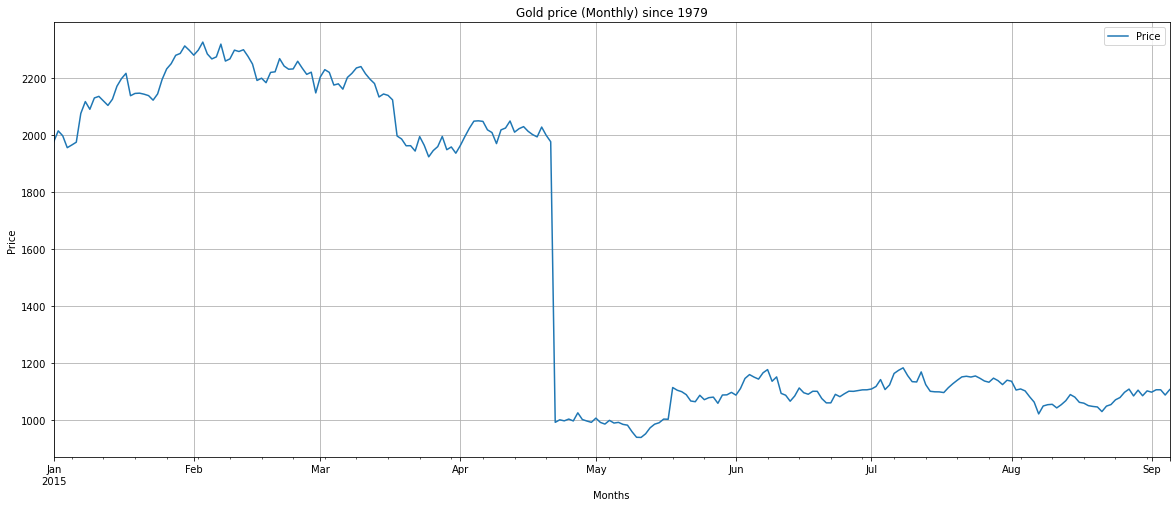

In [11]:
df.plot(figsize=(20,8))
plt.title("Gold price (Monthly) since 1979")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid();

In [12]:
round(df.describe(),3)

,Price
count,248.000
mean,1547.978
std,529.468
min,937.500
25%,1085.912
50%,1149.325
75%,2125.312
max,2324.700


## Visual Analysis <a class="anchor" id="section2.2"></a>

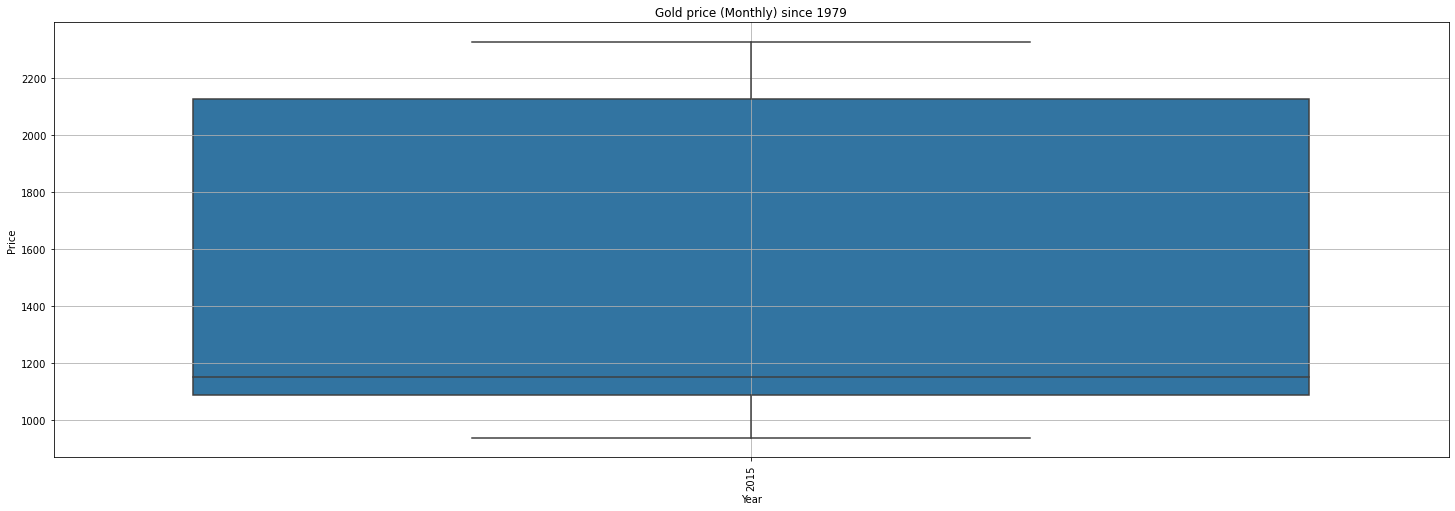

In [13]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.title("Gold price (Monthly) since 1979")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid();

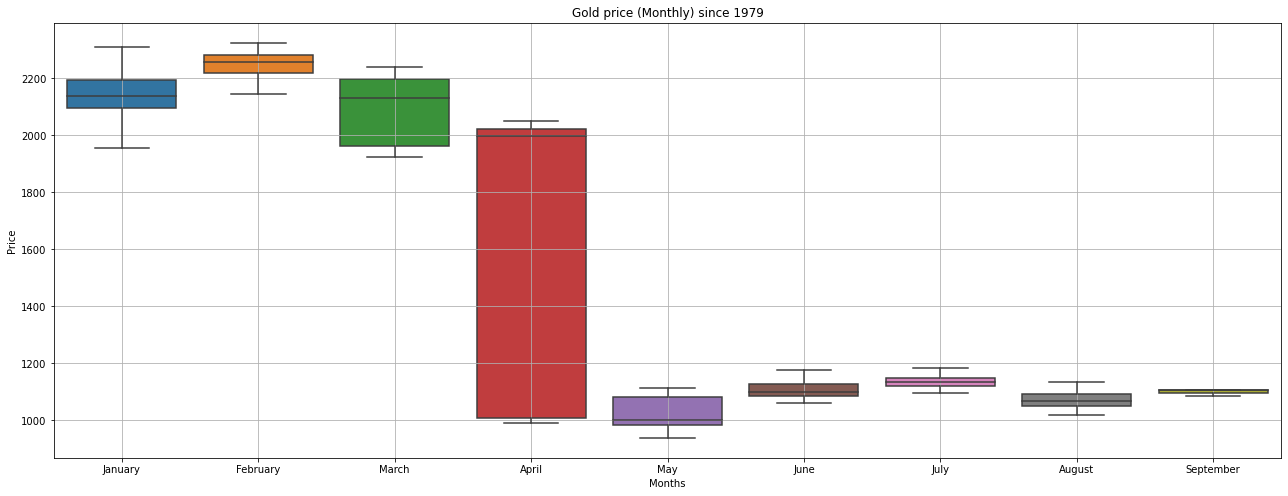

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.title("Gold price (Monthly) since 1979")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid();

In [15]:
# from statsmodels.graphics.tsaplots import month_plot

# fig, ax = plt.subplots(figsize=(22,8))

# month_plot(df,ylabel='Stocks price',ax=ax)
# plt.title("Gold price (Monthly) since 1979")
# plt.xlabel("Months")
# plt.ylabel("Price")
# plt.grid();

In [16]:
# # Average gold price per year trend since 1979
# df_yearly_sum = df.resample('A').mean()
# df_yearly_sum.plot();
# plt.title("Average Gold price (Yearly) since 1979")
# plt.xlabel("Year")
# plt.ylabel("Price")
# plt.grid()

In [17]:
# # Average gold price per quarter trend since 1979
# df_quarterly_sum = df.resample('Q').mean()
# df_quarterly_sum.plot();
# plt.title("Average Gold price (Quarterly) since 1979")
# plt.xlabel("Quarter")
# plt.ylabel("Price")
# plt.grid()

In [18]:
# Average gold price per decade trend since 1979
# df_decade_sum = df.resample('10Y').mean()
# df_decade_sum.plot();
# plt.title("Average Gold price (Decade) since 1979")
# plt.xlabel("Decade")
# plt.ylabel("Price")
# plt.grid()

### Analysis in Coefficient of variation

In [19]:
# Coefficient of variation in price
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1['CoV_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,CoV_pct
month,,,
2015,1547.978226,529.468189,34.2


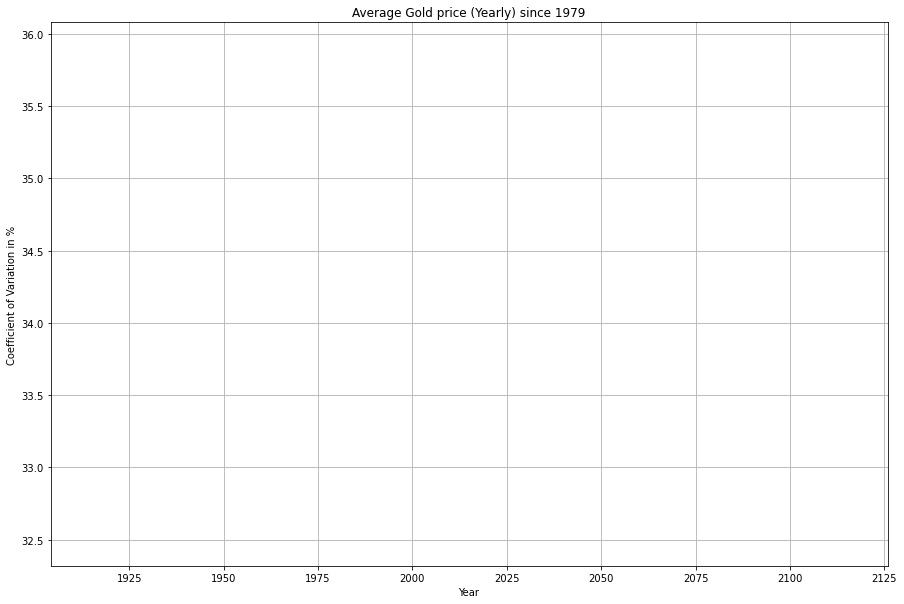

In [20]:
# Average gold price per year trend since 1979
fig, ax = plt.subplots(figsize=(15,10))
df_1['CoV_pct'].plot();
plt.title("Average Gold price (Yearly) since 1979")
plt.xlabel("Year")
plt.ylabel("Coefficient of Variation in %")
plt.grid()

**Inference**

1. The CV value reached its highest in year 1979, which could have made the asset as highly risky
2. But in 2017, the CV value is lowest, which makes the asset viable for good investment

# Time Series - Forecasting models <a class="anchor" id="section3"></a>

## Train - Test split to build Time series forecasting models <a class="anchor" id="section3.1"></a>

In [21]:
train    =   df[df.index.month <= 7] 
test     =   df[df.index.month > 7]

In [22]:
print(train.shape)
print(test.shape)

(212, 1)
(36, 1)


In [41]:
# train['Price'].plot(figsize=(13,5), fontsize=14)
# test['Price'].plot(figsize=(13,5), fontsize=14)
# plt.grid()
# plt.legend(['Training Data','Test Data'])
# plt.show()

In [24]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(212, 36)

### Simple Exponential Smoothing <a class="anchor" id="section3.6"></a>

In [25]:
SES_train = train.copy()
SES_test = test.copy()

In [26]:
SES_train.describe()

,Price
count,212.000000
mean,1628.321462
std,532.321048
min,937.500000
25%,1097.900000
50%,1950.650000
75%,2143.275000
max,2324.700000


In [27]:
model_SES = SimpleExpSmoothing(SES_train['Price'])
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\kesha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\kesha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [28]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1974.4,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [29]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Price,predict
month,,
2015-08-01,1134.60,1138.223349
2015-08-02,1103.85,1138.223349
2015-08-03,1107.60,1138.223349
2015-08-04,1100.80,1138.223349
2015-08-05,1080.20,1138.223349


In [30]:
final_model =  ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.4,
                                                           smoothing_trend=0.3,
                                                           smoothing_seasonal=0.6)

C:\Users\kesha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\kesha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [31]:
# MAPE_final_model = mape(df['Price'].values,final_model.fittedvalues)

# print('MAPE:',MAPE_final_model)

In [32]:
fd1=pd.read_csv('test_stocks_final.csv')

In [33]:
test=fd1   
test

,month
0,11-08-2010


In [34]:
prediction = final_model.forecast(steps=len(test))

In [35]:
int(prediction[0]*82.79)

90645

In [36]:
val=int(prediction[0]*82.79)
converted_num = "{}".format(val)

In [37]:
converted_num=", "+converted_num

In [38]:
with open("final_output.txt", 'a') as file2:
    file2.write(converted_num)

In [39]:
# # Compute 95% confidence interval for predicted values
# pred_df = pd.DataFrame({'prediction':prediction})
# pred_df.head()

In [40]:
# # plot the forecast along with the confidence band

# axis = df.plot(label='Actual', figsize=(15,8))
# pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
# # axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='k', alpha=.15)
# axis.set_xlabel('Year-Months')
# axis.set_ylabel('Price')
# plt.legend(loc='best')
# plt.grid()
# plt.show()